In [82]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras
from keras.datasets import fashion_mnist, cifar10
from keras.layers import Dense, Flatten, Normalization, Dropout, Conv2D, MaxPooling2D, RandomFlip, RandomRotation, RandomZoom
from keras.models import Sequential
from keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
from keras import utils

import matplotlib as mpl
import matplotlib.pyplot as plt

# Neural Networks and Images

Images are perhaps the place where neural networks have had the most dramatic impact. The best neural networks can very accurately perform image recognition, to the point that they can identify disease in medical imaging better than doctors, or track people's faces (or even their gait) in real time video. 

## Image Data

Until now we've used simple images that only have one color, we can expand this a bit now to handle more "normal" images. We will use one of the sample ones from Keras called cifar10. 

### Color Images

Color images have a greater depth - one layer for each color. Usually this is one for red, blue, and green, or RGB. There are other color encodings, but the idea is pretty similar. Of note for us, these images are now 3 dimensional - in terms of their representation as an array. 

![RGB](images/rgb.png "RGB" )

In [22]:
# Load data
# Note: the class names are taken from the documentation
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


### Visualizing

We can use imshow to display one image. 

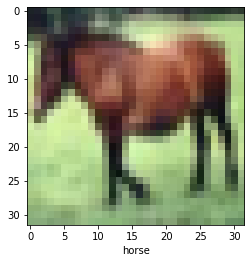

In [4]:
plt.imshow(X_train[7])
plt.xlabel(class_names[y_train[7][0]]) #The CIFAR labels happen to be arrays, so we need the extra index
plt.show()

### Helper Functions

We can make a simple helper to display an image. We can also use our loss plotting function from before. 

In [5]:
def show_img(data, labels, names, index):
    plt.xticks([])
    plt.yticks([])
    plt.imshow(data[index])
    plt.xlabel(names[labels[index][0]]) #The CIFAR labels happen to be arrays, so we need the extra index
    plt.show()

In [6]:
# Helper to plot loss
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.legend()
  plt.grid(True)
  plt.show()

In [7]:
def plot_acc(history):
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label='val_accuracy')
  plt.legend()
  plt.grid(True)
  plt.show()

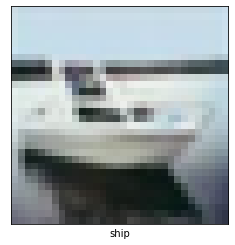

In [8]:
show_img(X_train, y_train, class_names, 192)

### Data Shape and Model

Our data starts as images that are 32 x 32 x 3 - 32 pixels by 32 pixels by color depth of 3 (RGB).

#### Flatten

One new addition we can utilize is the Flatten layer, which does exactly what is says.  The flatten layer does the same thing we did when reshaping digit images, it makes them into a flat array. We specify the shape of one example of our dataset as the input shape argument. 

### Classification - Activation and Loss

Since we are doing a classification with Keras now we need to make a few small changes to handle that. 

#### Activation

The first change is the activation on the output layer. When doing regression we want raw predictions, so there's no activation. Here we want to classify so we need to add activation. Since we are classifying into multiple classes we can use softmax to do so. We also have to set the units to the number of classes that we are predicting, in this case 10. 

Recall from when we first looked at multiclass classifications, the result of softmax is that we get a breakdown of probabilities that each record belongs to each of the classes, totalling to 1. Each class is represented by an output neuron, and the largest one wins and gets the label. 

#### Loss

We also want to use different loss metrics when doing classifications. Here we will use categorical cross entropy. 

We will need to use to_categorical here to make our current labels (e.g. [4]) into a one-hot categorical array (e.g. [0,0,0,0,1,0,0,0,0,0]). 

In [23]:
y_test = np_utils.to_categorical(y_test)
y_train = np_utils.to_categorical(y_train)

In [10]:
model = Sequential()
model.add(Flatten(input_shape=(32, 32, 3)))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 256)               786688    
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 789,258
Trainable params: 789,258
Non-trainable params: 0
_________________________________________________________________


2022-03-23 10:54:36.250243: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/100
350/350 [==============================] - 3s 7ms/step - loss: 2.0037 - accuracy: 0.2943 - val_loss: 1.8344 - val_accuracy: 0.3565
Epoch 2/100
350/350 [==============================] - 2s 5ms/step - loss: 1.8006 - accuracy: 0.3628 - val_loss: 1.7951 - val_accuracy: 0.3644
Epoch 3/100
350/350 [==============================] - 2s 6ms/step - loss: 1.7379 - accuracy: 0.3882 - val_loss: 1.7481 - val_accuracy: 0.3789
Epoch 4/100
350/350 [==============================] - 2s 5ms/step - loss: 1.6869 - accuracy: 0.4050 - val_loss: 1.6870 - val_accuracy: 0.4062
Epoch 5/100
350/350 [==============================] - 2s 5ms/step - loss: 1.6515 - accuracy: 0.4166 - val_loss: 1.7092 - val_accuracy: 0.3929
Epoch 6/100
350/350 [==============================] - 2s 5ms/step - loss: 1.6219 - accuracy: 0.4292 - val_loss: 1.6458 - val_accuracy: 0.4193
Epoch 7/100
350/350 [==============================] - 2s 6ms/step - loss: 1.5959 - accuracy: 0.4338 - val_loss: 1.6298 - val_accuracy: 0.4250

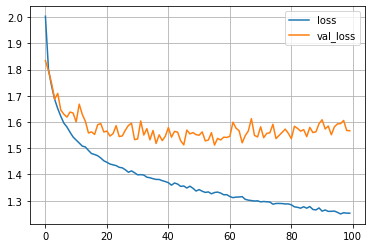

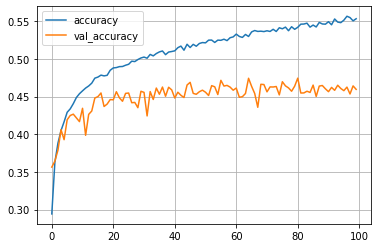

In [11]:
callback = EarlyStopping(monitor='loss', patience=50, restore_best_weights=True) 

model.compile(loss="categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])
train_log = model.fit(X_train, y_train, epochs=100, batch_size=100, validation_split=.3, verbose=1, callbacks=[callback])
model.evaluate(X_test, y_test, verbose=2)
plot_loss(train_log)
plot_acc(train_log)

Our simple model likely didn't do all that well, each of our images is pretty large, so we can likely see improvements by using a larger model. 

In [12]:
model = Sequential()
model.add(Flatten(input_shape=(32, 32, 3)))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               786688    
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dense_4 (Dense)             (None, 256)               65792     
                                                                 
 dense_5 (Dense)             (None, 10)                2570      
                                                                 
Total params: 920,842
Trainable params: 920,842
Non-trainable params: 0
_________________________________________________________________


Epoch 1/100
700/700 [==============================] - 4s 6ms/step - loss: 1.8845 - accuracy: 0.3132 - val_loss: 1.7607 - val_accuracy: 0.3655
Epoch 2/100
700/700 [==============================] - 4s 6ms/step - loss: 1.7078 - accuracy: 0.3858 - val_loss: 1.7082 - val_accuracy: 0.3760
Epoch 3/100
700/700 [==============================] - 4s 6ms/step - loss: 1.6356 - accuracy: 0.4154 - val_loss: 1.6360 - val_accuracy: 0.4107
Epoch 4/100
700/700 [==============================] - 4s 6ms/step - loss: 1.5626 - accuracy: 0.4401 - val_loss: 1.6942 - val_accuracy: 0.4051
Epoch 5/100
700/700 [==============================] - 4s 6ms/step - loss: 1.5193 - accuracy: 0.4535 - val_loss: 1.5787 - val_accuracy: 0.4343
Epoch 6/100
700/700 [==============================] - 4s 6ms/step - loss: 1.4874 - accuracy: 0.4686 - val_loss: 1.5460 - val_accuracy: 0.4554
Epoch 7/100
700/700 [==============================] - 4s 5ms/step - loss: 1.4372 - accuracy: 0.4859 - val_loss: 1.5223 - val_accuracy: 0.4589

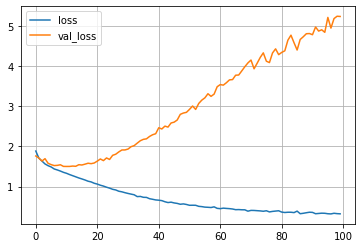

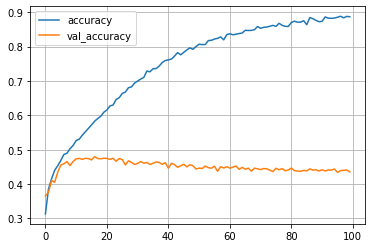

In [13]:
callback = EarlyStopping(monitor='loss', patience=50, restore_best_weights=True) 

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
train_log = model.fit(X_train, y_train, epochs=100, batch_size=50, validation_split=.3, verbose=1, callbacks=[callback])
model.evaluate(X_test, y_test, verbose=2)
plot_loss(train_log)
plot_acc(train_log)

## CNNs - Convolutional Neural Networks

To deal with images a little bit better we can use a different kind of neural network design - a CNN, or convolutional neural network. 

In short, a CNN is able to look at an image "as it is" caputuring spatial relationships that processing an image as a flattened array do not. When using a CNN we can first process the image in its original dimensions in the initial layers of the network, then flatten it down to go through a more familiar set of layers for the final prediction. 

A CNN looks at an image bit by bit, looking at a small square, then sliding over a few pixels, looking at another square, and so on. This has the effect of being able to extract features from areas of an image - as an example, think of an image of a bike, a CNN would be able to identify the distinct shape of a seat or handle bars as the image passes through the layers. 

### CNN Structure

A CNN has some new types of layers:
<ul>
<li> Convolutional layer - the convolutional layer looks at a small frame of the image at a time.
<li> Pooling layer - the pooling layer reduced the dimensionality of the data. 
<li> Regular neural network - after the convolutional parts to their work, we can flatten the data and pass it to a regular fully connected network at the final layers. 
</ul>

### Convolutional Layer

The convolutional layer is easiest to think of as a microscope that scrolls over an image looking at one small square of it at a time. 

![Kernel] (images\cnn_kernel.gif "Kernel" )

This convolution operation translates the input "feature map" into an "output map". After the transformation the result is that each layer captures some features in the image - edges, orientation, etc... and map those down to lower layers. 

### Padding

Padding is a setting that determines if the dimensionality of the data is reduced in the convolutional layer or not. We have two choices:

<ul>
<li> Valid padding - dimensions are reduced. 
<li> Same padding - dimensions are maintained. 
</ul>

This is probably most easily illustrated by looking at the image above. That image is showing same padding - those 0s around the border are inserted to ensure that the kernel can start at the edge and still capture the entire picture. If this were valid padding the kernel would start at the real edge, and those edge values would never make it to the middle of the image. The resulting values will then be of a smaller dimension than the original. 

#### Strides

The stride value is how many pixels the kernel window shifts each time it looks at a window. Strides of 1 move 1 pixel at a time, larger strides "skip" some pixels. 

### Pooling Layer

The pooling layer reduces the dimensionality of the data down. 

#### Max and Average Pooling

![Max_Average_Pooling] (images\max_avg_pool.png "Max_Average_Pooling" )

### Normal Neural Network

Once the above work is done, potentially with several layers of layers, the final layers in the network are a normal neural network. The CNN parts act to extract features from the image, the final layers take those features and produce a prediction, just as we are used to. 


In [27]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation="softmax"))
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 flatten_8 (Flatten)         (None, 1024)             

Epoch 1/20
7/7 [==============================] - 20s 2s/step - loss: 0.9053 - accuracy: 0.6860 - precision: 0.7724 - recall: 0.6009 - val_loss: 0.9640 - val_accuracy: 0.6673 - val_precision: 0.7710 - val_recall: 0.5696
Epoch 2/20
7/7 [==============================] - 14s 2s/step - loss: 0.7532 - accuracy: 0.7359 - precision: 0.8284 - recall: 0.6388 - val_loss: 0.9480 - val_accuracy: 0.6759 - val_precision: 0.7703 - val_recall: 0.5883
Epoch 3/20
7/7 [==============================] - 16s 2s/step - loss: 0.7126 - accuracy: 0.7575 - precision: 0.8470 - recall: 0.6585 - val_loss: 0.9222 - val_accuracy: 0.6857 - val_precision: 0.7750 - val_recall: 0.6015
Epoch 4/20
7/7 [==============================] - 15s 2s/step - loss: 0.6843 - accuracy: 0.7638 - precision: 0.8469 - recall: 0.6784 - val_loss: 0.9160 - val_accuracy: 0.6893 - val_precision: 0.7716 - val_recall: 0.6137
Epoch 5/20
7/7 [==============================] - 15s 2s/step - loss: 0.6680 - accuracy: 0.7690 - precision: 0.8515 - re

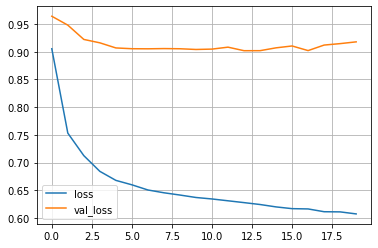

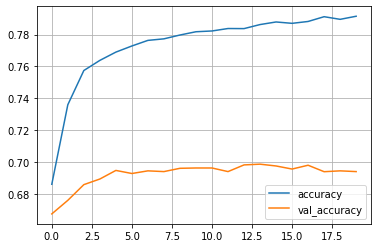

In [68]:
callback = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True) 
acc = keras.metrics.CategoricalAccuracy(name="accuracy")
pre = keras.metrics.Precision(name="precision")
rec = keras.metrics.Recall(name="recall")
metric_list = [acc, pre, rec]
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=metric_list)
train_log = model.fit(X_train, y_train, epochs=20, batch_size=5000, validation_split=.3, verbose=1, callbacks=[callback])
train_eval = model.evaluate(X_train, y_train)
test_eval = model.evaluate(X_test, y_test, verbose=2)
plot_loss(train_log)
plot_acc(train_log)

In [67]:
#Compile Results
import inspect
metric_list_fin =[]
for met in metric_list:
    atts = inspect.getmembers(met)
    tmp_name = [a for a in atts if(a[0] == "_name")]
    metric_list_fin.append(tmp_name[0][1])

metric_list_fin.insert(0,"loss")
metric_df = pd.DataFrame(
    {'Metrics': metric_list_fin,
     'Train': train_eval,
     'Test': test_eval
    })
metric_df.head()

/Users/akeems/opt/anaconda3/envs/ml3950/lib/python3.9/inspect.py:351: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  value = getattr(object, key)


,Metrics,train,test
0,loss,0.853735,0.993728
1,accuracy,0.702060,0.654300
2,precision,0.802844,0.752055
3,recall,0.598520,0.558100


## Directories of Images



In [70]:
import pathlib
import PIL 

dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file(origin=dataset_url,
                                   fname='flower_photos',
                                   untar=True)
data_dir = pathlib.Path(data_dir)

228827136/228813984 [==============================] - 24s 0us/step


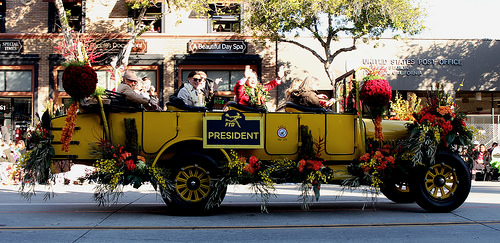

In [71]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[0]))

### Datasets

When dealing with things like images we commonly have actual images, not arrays or dataframes. Keras has a preprocessing function to take a folder of images and automatically create a dataset from it. 

A dataset is a built in datatype in tensorflow, it is kind of a specialized type of dataframe that is meant to store larger volumes of generally non-tabular data, and is purpose made to be put through tensorflow networks. Here we will basically have the image files on disk be automatically loaded and split into two datasets - training and validation. When fitting the model we can use this dataset just as we would an array. 

This type of setup is fairly common when dealing with images. 

In [73]:
#Flowers
batch_size = 32
img_height = 180
img_width = 180

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

class_names = train_ds.class_names
print(class_names)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.
['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


In [79]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(180, 180, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(5))
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 89, 89, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 43, 43, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 41, 41, 64)        36928     
                                                                 
 flatten_11 (Flatten)        (None, 107584)          

Epoch 1/10
92/92 [==============================] - 64s 678ms/step - loss: 23.0662 - accuracy: 0.2408 - val_loss: 1.5879 - val_accuracy: 0.2752
Epoch 2/10
92/92 [==============================] - 62s 671ms/step - loss: 1.5369 - accuracy: 0.3185 - val_loss: 1.6799 - val_accuracy: 0.2452
Epoch 3/10
92/92 [==============================] - 60s 653ms/step - loss: 1.3312 - accuracy: 0.4223 - val_loss: 1.9444 - val_accuracy: 0.2629
Epoch 4/10
92/92 [==============================] - 59s 645ms/step - loss: 1.0890 - accuracy: 0.5487 - val_loss: 2.9316 - val_accuracy: 0.2711
Epoch 5/10
92/92 [==============================] - 60s 653ms/step - loss: 0.8821 - accuracy: 0.6495 - val_loss: 4.1182 - val_accuracy: 0.2616
Epoch 6/10
92/92 [==============================] - 53s 578ms/step - loss: 0.7334 - accuracy: 0.7306 - val_loss: 4.8883 - val_accuracy: 0.2643
Epoch 7/10
92/92 [==============================] - 52s 568ms/step - loss: 0.5889 - accuracy: 0.7813 - val_loss: 5.6302 - val_accuracy: 0.267

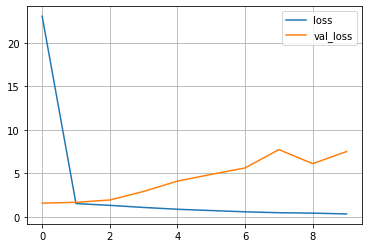

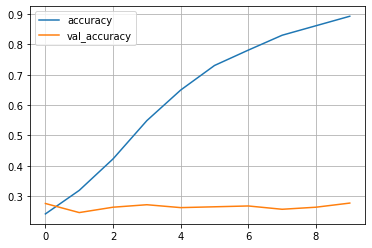

In [81]:
callback = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True) 

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer="adam", metrics=keras.metrics.SparseCategoricalAccuracy(name="accuracy"))
train_log = model.fit(train_ds, epochs=10, verbose=1, callbacks=[callback], validation_data=val_ds)
train_eval = model.evaluate(train_ds)
plot_loss(train_log)
plot_acc(train_log)

## Data Augmentation

In [83]:
augment = keras.Sequential([])
augment.add(RandomFlip("horizontal", input_shape=(img_height, img_width,3)))
augment.add(RandomRotation(0.1))
augment.add(RandomZoom(0.1))

In [84]:
model = Sequential()
model.add(augment)
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(180, 180, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(5))
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_12 (Sequential)  (None, 180, 180, 3)       0         
                                                                 
 conv2d_30 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 89, 89, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 43, 43, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 41, 41, 64)      

Epoch 1/10
92/92 [==============================] - 63s 677ms/step - loss: 1.5160 - accuracy: 0.3804 - val_loss: 1.9489 - val_accuracy: 0.2684
Epoch 2/10
92/92 [==============================] - 62s 668ms/step - loss: 1.4908 - accuracy: 0.3638 - val_loss: 1.5214 - val_accuracy: 0.2956
Epoch 3/10
92/92 [==============================] - 60s 652ms/step - loss: 1.4777 - accuracy: 0.3559 - val_loss: 1.4587 - val_accuracy: 0.3556
Epoch 4/10
92/92 [==============================] - 58s 630ms/step - loss: 1.3229 - accuracy: 0.4649 - val_loss: 1.2414 - val_accuracy: 0.4646
Epoch 5/10
92/92 [==============================] - 63s 688ms/step - loss: 1.2456 - accuracy: 0.5007 - val_loss: 1.2759 - val_accuracy: 0.4469
Epoch 6/10
92/92 [==============================] - 64s 700ms/step - loss: 1.2039 - accuracy: 0.4918 - val_loss: 1.2418 - val_accuracy: 0.4455
Epoch 7/10
92/92 [==============================] - 77s 839ms/step - loss: 1.1745 - accuracy: 0.5017 - val_loss: 1.1270 - val_accuracy: 0.5014

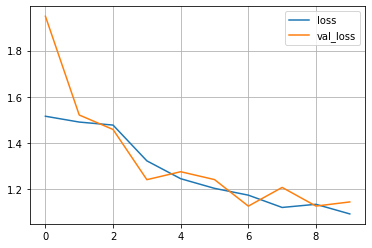

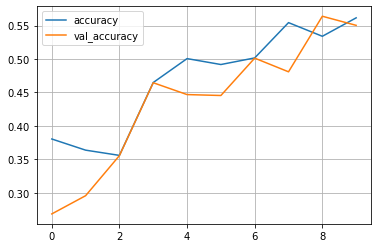

In [88]:
callback = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True) 

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer="adam", metrics=keras.metrics.SparseCategoricalAccuracy(name="accuracy"))
train_log = model.fit(train_ds, epochs=10, verbose=1, callbacks=[callback], validation_data=val_ds)
train_eval = model.evaluate(train_ds)
plot_loss(train_log)
plot_acc(train_log)